### V7 V10 V4 V14 ARE FEATURES MORE RESPONSIBEL ACC TO DTREES AND BAGGING

In [1]:
import pandas as pd
df = pd.read_csv(r'..\data\processed\scaledDataForUSMPWithOutlier.csv')


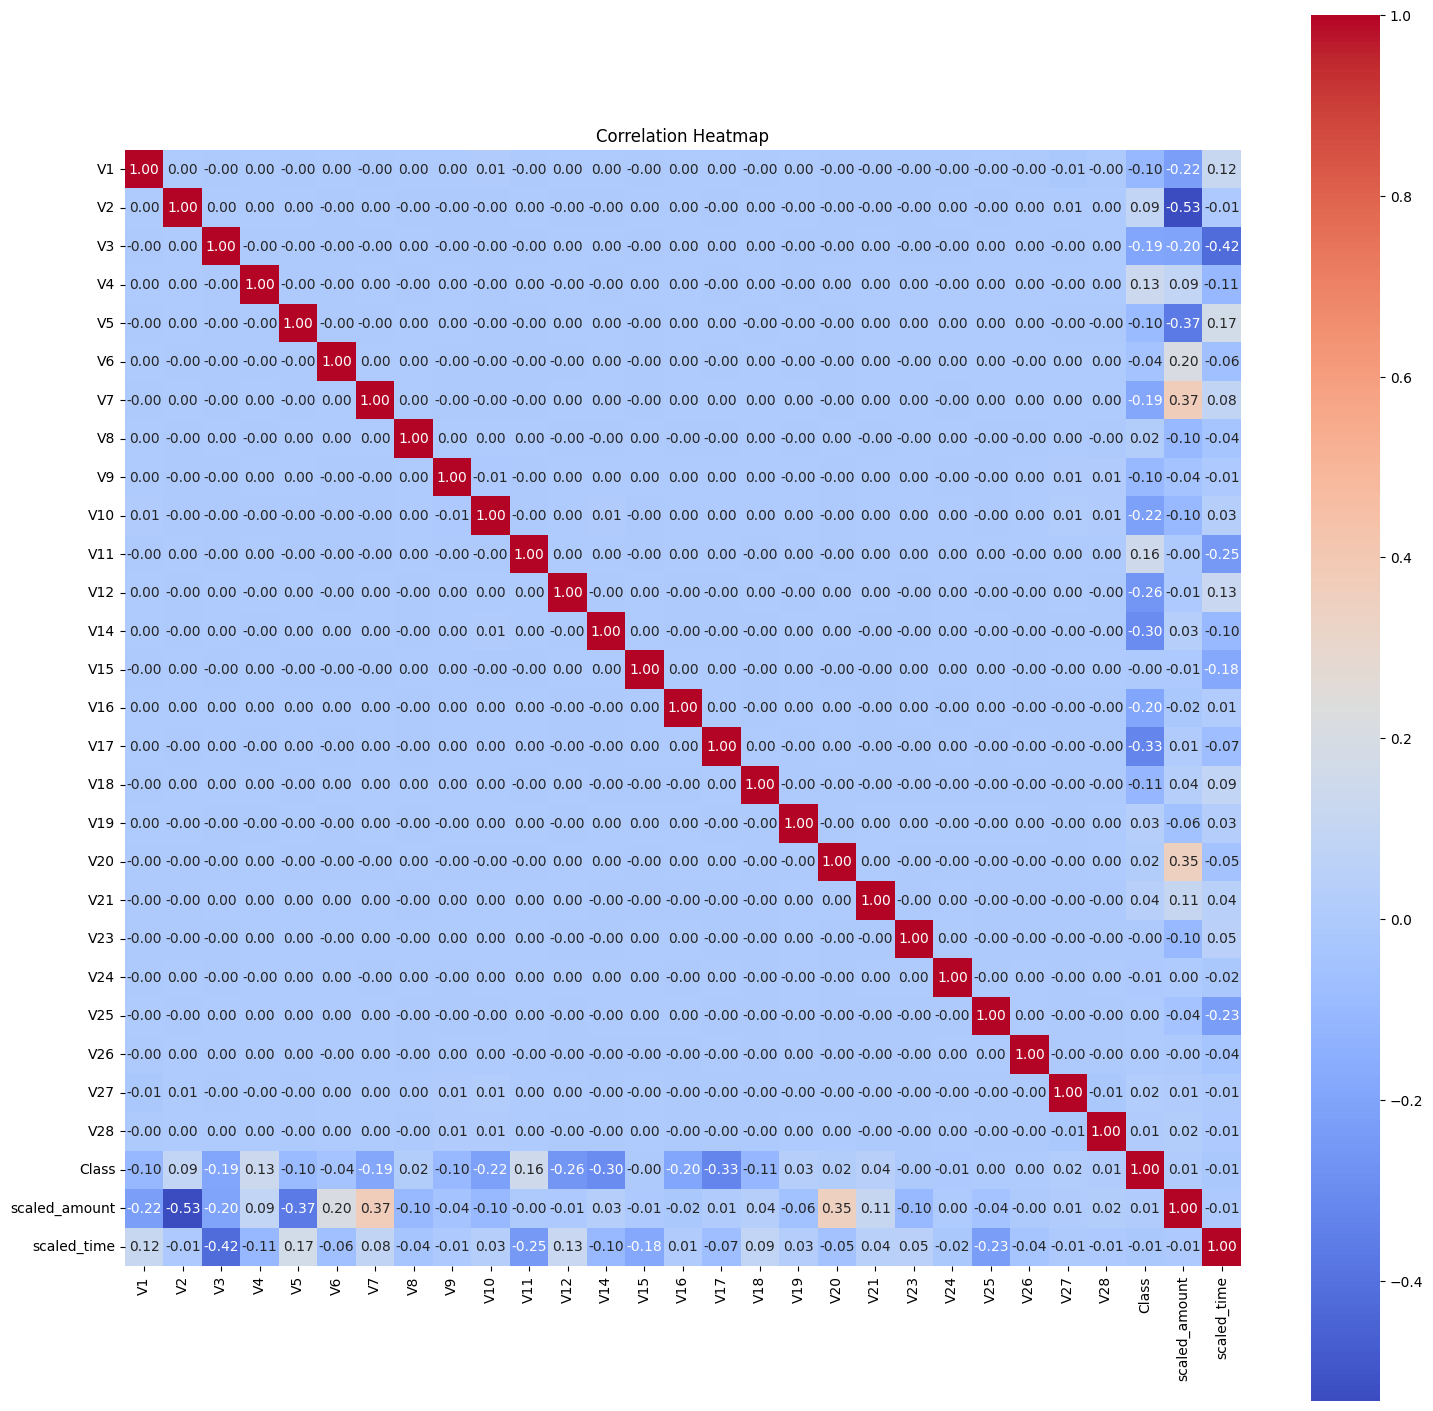

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# from past things
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
target_feature = 'Class'  
sorted_corr = corr_matrix[target_feature].sort_values()  # Sort in ascending order


sorted_corr_df = sorted_corr.to_frame().rename(columns={target_feature: 'Correlation'})


In [4]:
sorted_corr_df

,Correlation
V17,-0.327250
V14,-0.303800
V12,-0.261114
V10,-0.218691
V16,-0.196946
V3,-0.193538
V7,-0.187792
V18,-0.111743
V1,-0.102031
V9,-0.098061


# 17,14,12,10,11,4,2  are features I am taking for corr as they are most relevant towards prediction
# AIm-> accuracy increase!

C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Lo

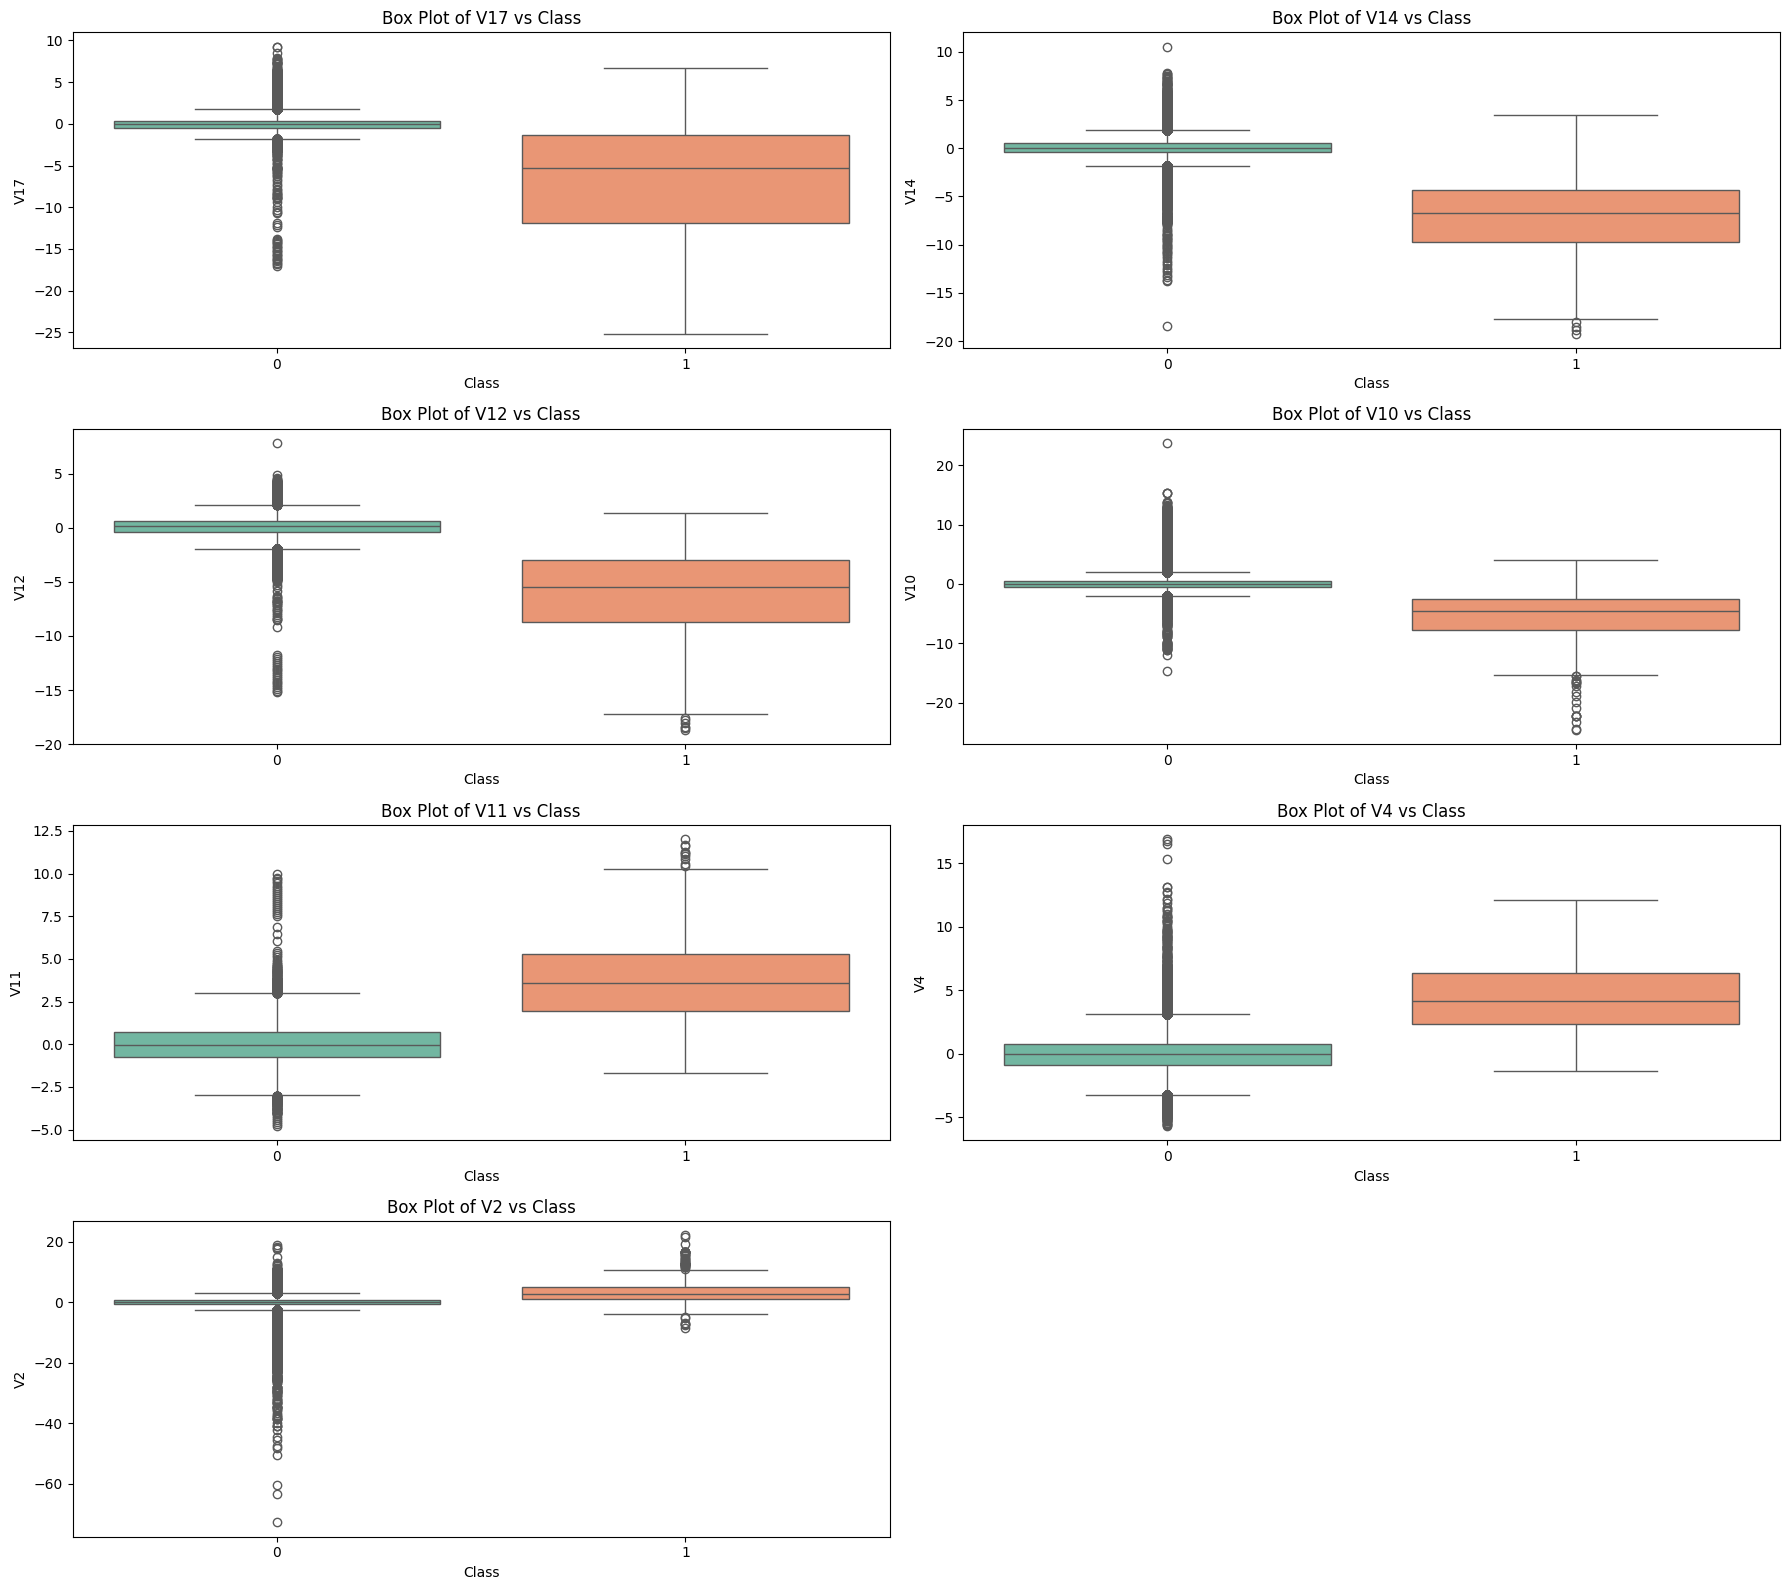

In [5]:
features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
    plt.title(f'Box Plot of {feature} vs Class')

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

columns_to_filter = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

mask_outliers = (df['Class'] == 0) & ((df[columns_to_filter] > 5) | (df[columns_to_filter] < -5)).any(axis=1)
df_cleaned = df[~mask_outliers].reset_index(drop=True)

print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")


Original shape: (283745, 29), New shape: (278490, 29)


In [10]:
print(mask_outliers.sum())

5255


In [12]:
import pandas as pd

# Assuming df is your dataset
columns_to_filter = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']
log_file = "removed_outliers.log"

# Open the log file
with open(log_file, "w") as log:
    log.write("Removed Outliers Log\n")
    log.write("=" * 80 + "\n")


    for index, row in df.iterrows():
        if row['Class'] == 0:  
            if any(row[col] > 5 or row[col] < -5 for col in columns_to_filter):  
                values_str = ", ".join([f"{col}={row[col]}" for col in columns_to_filter])
                log.write(f"Row {index} removed: {values_str}\n")
mask_outliers = (df['Class'] == 0) & ((df[columns_to_filter] > 5) | (df[columns_to_filter] < -5)).any(axis=1)
df_cleaned = df[~mask_outliers].reset_index(drop=True)

print(f"Log file '{log_file}' has been created.")
print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")


Log file 'removed_outliers.log' has been created.
Original shape: (283745, 29), New shape: (278490, 29)


### Now most of them dont have much outliers so I can again do random undersampling


In [14]:
df=df_cleaned.copy()

In [15]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.375514,0.907504,1.079103,-0.413849,0.480315,0.080346,0.532544,0.198103,-0.460096,-0.120585,...,-0.261015,-0.166065,-0.878194,-0.093717,0.128657,0.254460,0.097417,0,-0.244021,-0.182961
1,0.088659,1.391381,-0.909840,0.882853,1.640724,-0.408531,1.440041,-0.244444,0.355858,-1.096048,...,0.057893,-0.042953,0.529083,-0.674236,-0.711382,0.245712,0.282911,0,0.227197,0.289403
2,1.936495,0.652187,-1.463777,3.811637,0.826842,-0.575351,0.733978,-0.251709,-1.202035,1.555541,...,0.126932,0.069081,1.113291,0.340075,0.116542,-0.094641,-0.057366,0,-0.021830,0.403401
3,1.274325,-1.046037,0.673192,-0.505360,-1.186838,0.513984,-1.209090,0.391635,0.118750,0.556306,...,0.110515,-0.121271,-0.289985,0.509243,-0.053447,0.036685,-0.004152,0,-0.029060,-0.089001
4,1.093639,-0.248331,0.612403,0.729435,-0.918993,-0.816926,-0.215800,-0.053365,0.519912,-0.056748,...,0.036837,-0.050192,0.390942,0.259114,0.343442,-0.039886,0.029889,0,0.805061,-0.283268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278485,1.887356,0.595489,-0.906208,3.516518,0.764441,0.226432,0.242288,-0.033473,-1.500697,1.685988,...,0.292258,0.069790,0.769422,0.125414,0.072855,-0.053585,-0.050945,0,-0.042825,0.631985
278486,1.122458,-0.305869,1.325175,0.811526,-1.260822,-0.135795,-0.815839,0.283976,0.866514,-0.031002,...,-0.042264,0.060153,0.533611,0.149887,0.291496,0.004343,0.016178,0,-0.178115,-0.546310
278487,-0.951867,1.819947,1.427060,4.401225,0.509573,3.068836,-0.992043,0.223683,-0.216643,0.902137,...,1.030329,0.185851,-0.404169,-0.911083,0.450149,-0.073010,0.120453,0,-0.125000,0.065614
278488,-0.355813,1.037123,1.142809,-0.139668,0.223897,-0.447363,0.572302,0.126015,-0.554029,-0.328525,...,-0.242970,-0.068094,-0.118282,-0.156061,0.079906,0.238000,0.083122,0,-0.252086,-0.976483


C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Lo

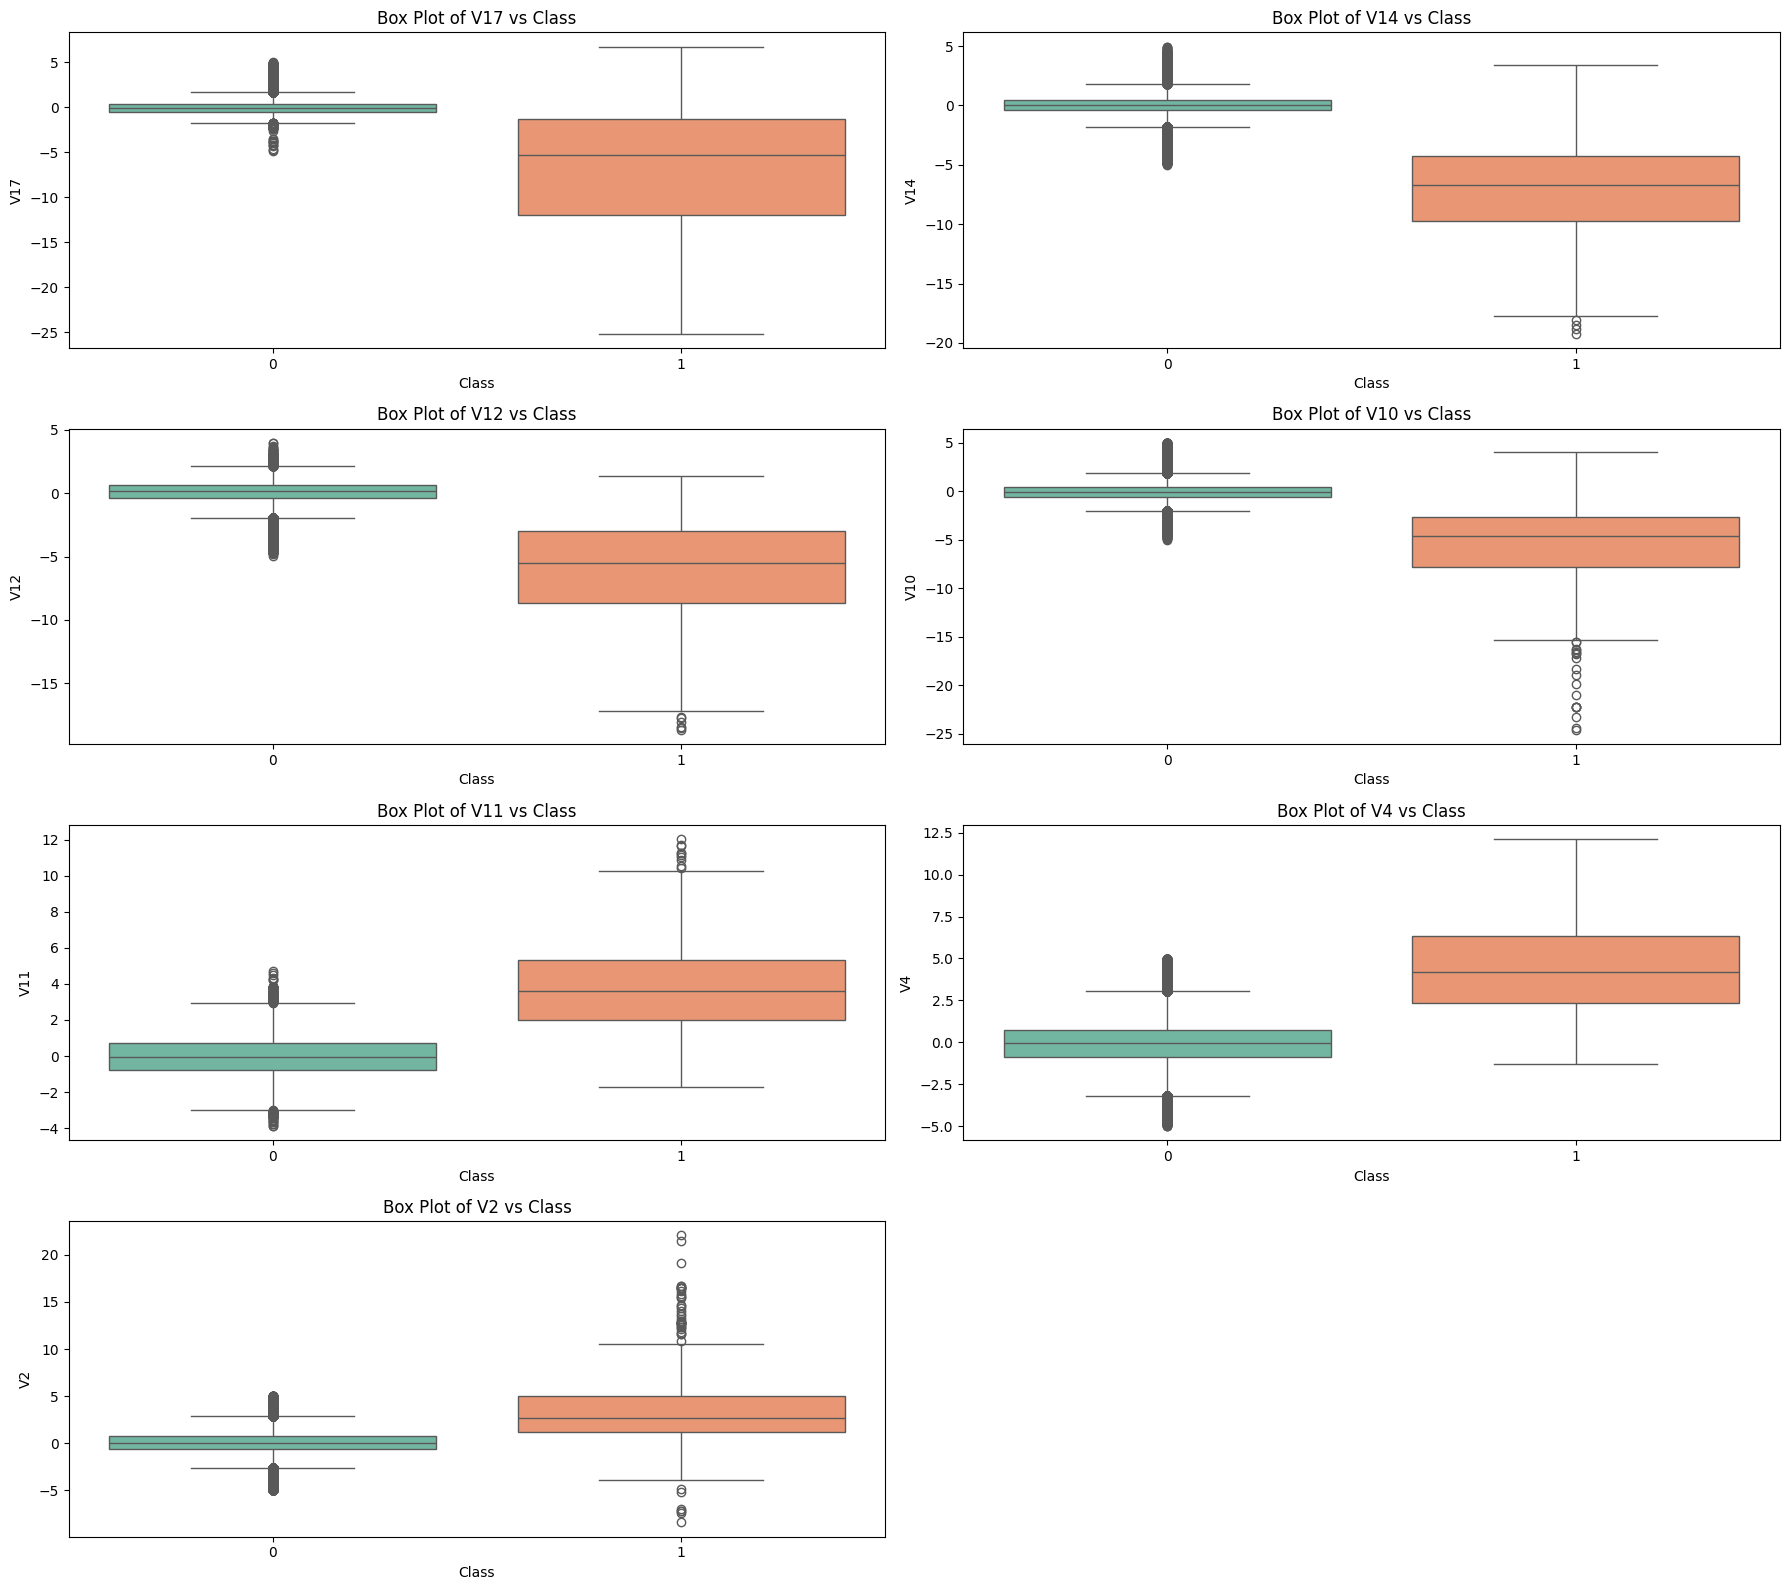

In [16]:
features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
    plt.title(f'Box Plot of {feature} vs Class')

plt.tight_layout()
plt.show()

### now outliers have significantly decreased

### Since class 1 already has less data , i have not done outlier removal from 1 as of now, will do if necessary but then there will be so much loss which we dont need at all

In [17]:
df = df.sample(frac=1)


fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
260108,1.914211,0.447895,-1.306622,3.671559,0.692274,-0.114467,0.380360,-0.047331,-1.118577,1.733572,...,0.282665,-0.113193,-0.362227,0.374508,0.298390,-0.081242,-0.078912,0,-0.027809,0.454454
120862,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,...,-1.032935,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1,-0.303115,-0.060584
114864,2.024614,0.052233,-1.917826,0.462587,0.286657,-1.218757,0.232977,-0.306396,0.734506,-0.468840,...,0.181923,-0.077854,-0.503055,0.255567,-0.073405,-0.009969,-0.032825,0,0.114572,0.426342
132151,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,2.993048,0.769124
115613,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,0.209086,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.283788,0.744609


In [18]:
df=new_df.copy()

In [20]:
df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Class']) 
y = df['Class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=2000)  
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.9543147208121827
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.95      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### As we can see accuracy has significantly improved over here

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [32]:
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'penalty': ['l1', 'l2', 'elasticnet', None], 
        'solver': ['liblinear', 'lbfgs', 'saga']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10,50, None], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 500], 
        'max_depth': [3, 5, 10, 50,None], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100], 
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'gamma': ['scale', 'auto'], 
        'degree': [2, 3, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10, 15], 
        'weights': ['uniform', 'distance'], 
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200, 500], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 5, 10], 
        'subsample': [0.5, 0.7, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 500], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 5, 10], 
        'gamma': [0, 0.1, 0.2], 
        'colsample_bytree': [0.3, 0.7, 1.0]
    }
}



In [27]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split



In [29]:
import optuna
import numpy as np
import logging
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


logging.basicConfig(filename="optuna_logs.log", level=logging.INFO, format="%(asctime)s - %(message)s")

best_accuracies = {}

def objective(trial):
    model_type = trial.suggest_categorical("model", ["Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression", "XGBoost", "Gradient Boosting"])

    if model_type == "Random Forest":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    elif model_type == "SVM":
        C = trial.suggest_loguniform("C", 0.01, 100)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
        model = SVC(C=C, kernel=kernel)

    elif model_type == "Decision Tree":
        max_depth = trial.suggest_int("max_depth", 3, 15)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    elif model_type == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15, step=2)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)

    elif model_type == "Logistic Regression":
        C = trial.suggest_loguniform("C", 0.01, 100)
        model = LogisticRegression(C=C, max_iter=500, solver='lbfgs')

    elif model_type == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    elif model_type == "Gradient Boosting":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()

    if model_type not in best_accuracies or score > best_accuracies[model_type]:
        best_accuracies[model_type] = score

    
    logging.info(f"Model: {model_type}, Accuracy: {score:.4f}, Params: {trial.params}")

    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("\nBest Accuracy for Each Model:")
for model, acc in best_accuracies.items():
    print(f"{model}: {acc:.4f}")


best_params = study.best_trial.params
best_model_type = best_params.pop("model")
print(f"\nBest Model: {best_model_type}")
print(f"Best Parameters: {best_params}")


if best_model_type == "Random Forest":
    best_model = RandomForestClassifier(**best_params, random_state=42)
elif best_model_type == "SVM":
    best_model = SVC(**best_params)
elif best_model_type == "Decision Tree":
    best_model = DecisionTreeClassifier(**best_params, random_state=42)
elif best_model_type == "KNN":
    best_model = KNeighborsClassifier(**best_params)
elif best_model_type == "Logistic Regression":
    best_model = LogisticRegression(**best_params, max_iter=500)
elif best_model_type == "XGBoost":
    best_model = XGBClassifier(**best_params, random_state=42)
elif best_model_type == "Gradient Boosting":
    best_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train on full dataset
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Best Model Accuracy on Test Data: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[I 2025-02-07 22:00:22,768] A new study created in memory with name: no-name-5825f22d-fbac-4592-a8dd-556cb2cb7f72
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\2286099392.py:47: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
[I 2025-02-07 22:00:25,579] Trial 0 finished with value: 0.9326715622248667 and parameters: {'model': 'XGBoost', 'n_estimators': 450, 'learning_rate': 0.021228898874784102, 'max_depth': 13}. Best is trial 0 with value: 0.9326715622248667.
[I 2025-02-07 22:00:25,682] Trial 1 finished with value: 0.9339486643640128 and parameters: {'model': 'KNN', 'n_neighbors': 5}. Best is trial 1 with value: 0.9339486643640128.
[I 2025-02-07 22:00:25,768] Trial 2 finished with value: 0.9301415454870886 and parameters: {'model': 'KNN', 'n_neig


Best Accuracy for Each Model:
XGBoost: 0.9377
KNN: 0.9339
Random Forest: 0.9403
SVM: 0.9479
Decision Tree: 0.9161
Gradient Boosting: 0.9238
Logistic Regression: 0.9441

Best Model: SVM
Best Parameters: {'C': 0.10554837471175015, 'kernel': 'linear'}

Final Best Model Accuracy on Test Data: 0.9492

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        99
           1       0.94      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



#### Above is done using K-fold cross validation, so there is no chance of over of underfitting and has got a baalnced number

In [33]:
import numpy as np
import pandas as pd
import logging
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Configure logging
logging.basicConfig(filename="gridsearch.log", level=logging.INFO, format="%(asctime)s - %(message)s")

models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = {}

for model_name, model in models.items():
    logging.info(f"\nTraining {model_name}...\n" + "="*50)
    print(f"\nTraining {model_name}...\n" + "="*50)

    model.fit(X_train, y_train)
    y_pred_default = model.predict(X_test)


    acc_default = accuracy_score(y_test, y_pred_default)
    report_default = classification_report(y_test, y_pred_default)

    logging.info(f"Default {model_name} Accuracy: {acc_default:.4f}")
    logging.info(f"Classification Report (Default):\n{report_default}")
    
    print(f"Default {model_name} Accuracy: {acc_default:.4f}")


    param_grid_model = param_grid[model_name]
    grid_search = GridSearchCV(model, param_grid_model, cv=5, n_jobs=-1, scoring='accuracy', verbose=True)
    grid_search.fit(X_train, y_train)


    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)


    acc_best = accuracy_score(y_test, y_pred_best)
    report_best = classification_report(y_test, y_pred_best)

    logging.info(f"Best {model_name} Accuracy: {acc_best:.4f}")
    logging.info(f"Best Hyperparameters: {grid_search.best_params_}")
    logging.info(f"Classification Report (Best):\n{report_best}\n" + "="*50)

    print(f"\nBest {model_name} Accuracy: {acc_best:.4f}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")


    results[model_name] = {
        'default_accuracy': acc_default,
        'best_accuracy': acc_best,
        'best_params': grid_search.best_params_,
        'classification_report': report_best
    }


logging.info("\nFinal Summary of Model Performances:\n" + "="*50)
print("\nFinal Summary of Model Performances:\n" + "="*50)
for model, result in results.items():
    logging.info(f"\n{model}")
    logging.info(f"Default Accuracy: {result['default_accuracy']:.4f}")
    logging.info(f"Best Accuracy: {result['best_accuracy']:.4f}")
    logging.info(f"Best Params: {result['best_params']}")
    logging.info("="*50)

    print(f"\n{model}")
    print(f"Default Accuracy: {result['default_accuracy']:.4f}")
    print(f"Best Accuracy: {result['best_accuracy']:.4f}")
    print(f"Best Params: {result['best_params']}")
    print("="*50)



Training Logistic Regression...
Default Logistic Regression Accuracy: 0.9543
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
            


Best Logistic Regression Accuracy: 0.9543
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Training Decision Tree...
Default Decision Tree Accuracy: 0.9239
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Decision Tree Accuracy: 0.9645
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training Random Forest...
Default Random Forest Accuracy: 0.9543
Fitting 5 folds for each of 360 candidates, totalling 1800 fits

Best Random Forest Accuracy: 0.9594
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Training SVM...
Default SVM Accuracy: 0.9442
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best SVM Accuracy: 0.9492
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Training KNN...
Default KNN Accuracy: 0.9289
Fitting 5 folds for each of 30 candidates, totalling 1

c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:24:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Default XGBoost Accuracy: 0.9492
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best XGBoost Accuracy: 0.9543
Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}

Final Summary of Model Performances:

Logistic Regression
Default Accuracy: 0.9543
Best Accuracy: 0.9543
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Decision Tree
Default Accuracy: 0.9239
Best Accuracy: 0.9645
Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Random Forest
Default Accuracy: 0.9543
Best Accuracy: 0.9594
Best Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

SVM
Default Accuracy: 0.9442
Best Accuracy: 0.9492
Best Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

KNN
Default Accuracy: 0.9289
Best Accuracy: 0.9289
Best Params: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

Gradient Boosting
Default Accuracy: 0.9391
Best Accuracy: 0.9442
Best Params: {'l

Train Accuracy: 0.9517
Test Accuracy: 0.9645

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.97      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



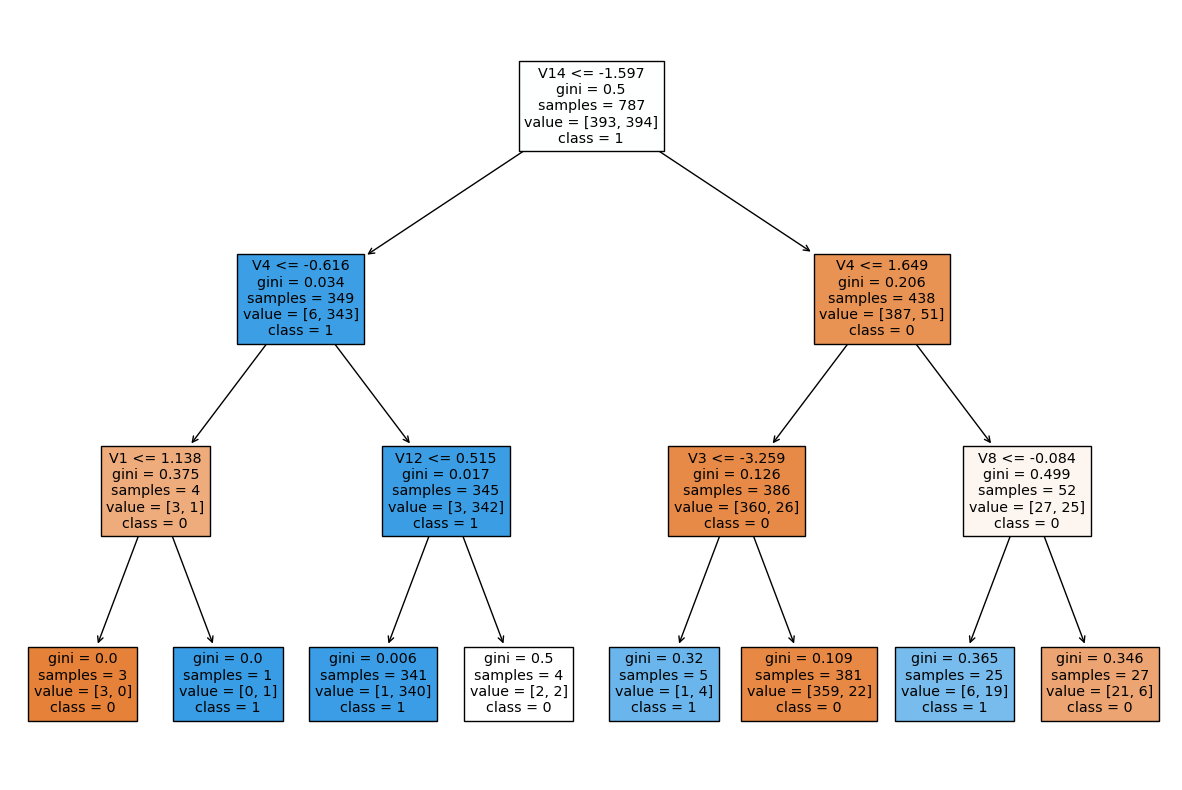


Feature Importance:
          Feature  Importance
12            V14    0.888991
3              V4    0.061008
7              V8    0.022891
2              V3    0.016580
11            V12    0.005957
0              V1    0.004573
17            V19    0.000000
26  scaled_amount    0.000000
25            V28    0.000000
24            V27    0.000000
23            V26    0.000000
22            V25    0.000000
21            V24    0.000000
20            V23    0.000000
19            V21    0.000000
18            V20    0.000000
14            V16    0.000000
16            V18    0.000000
15            V17    0.000000
1              V2    0.000000
13            V15    0.000000
10            V11    0.000000
9             V10    0.000000
8              V9    0.000000
6              V7    0.000000
5              V6    0.000000
4              V5    0.000000
27    scaled_time    0.000000


In [34]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), filled=True)
plt.show()



Training Bagging (Decision Tree)...


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging (Decision Tree): {'n_estimators': 100}
Training Bagging (SVM)...


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging (SVM): {'n_estimators': 50}
Training Bagging (KNN)...


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for Bagging (KNN): {'n_estimators': 100}
Training AdaBoost (Decision Tree)...


c:\Users\Charanjeet Juneja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters for AdaBoost (Decision Tree): {'learning_rate': 0.1, 'n_estimators': 100}

Bagging (Decision Tree) Results:
Accuracy: 0.9543147208121827
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


Bagging (SVM) Results:
Accuracy: 0.9441624365482234
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197


Bagging (KNN) Results:
Accuracy: 0.934010152284264
Classification Report:
               pr

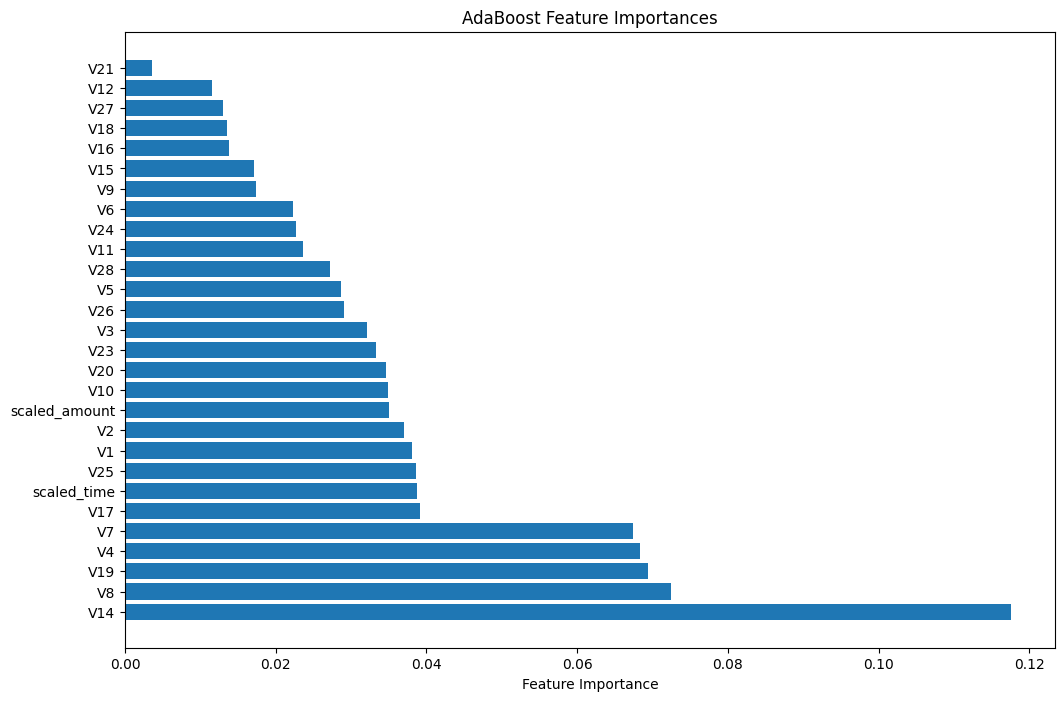

In [36]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

base_estimators = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}
models = {
    'Bagging (Decision Tree)': BaggingClassifier(
        base_estimator=DecisionTreeClassifier(
            criterion='gini', 
            max_depth=3, 
            min_samples_leaf=1, 
            min_samples_split=2
        ), 
        n_estimators=50
    ),
    'Bagging (SVM)': BaggingClassifier(base_estimator=SVC(), n_estimators=50),
    'Bagging (KNN)': BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50),
    'AdaBoost (Decision Tree)': AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3), 
        n_estimators=50
    )
}



param_grid = {
    'Bagging (Decision Tree)': {'n_estimators': [10, 50, 100]},
    'Bagging (SVM)': {'n_estimators': [10, 50, 100]},
    'Bagging (KNN)': {'n_estimators': [10, 50, 100]},
    'AdaBoost (Decision Tree)': {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 1]}
}

best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


adaboost_model = best_models['AdaBoost (Decision Tree)']
importances = adaboost_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.title("AdaBoost Feature Importances")
plt.barh(X.columns[indices], importances[indices], align="center")
plt.xlabel("Feature Importance")
plt.show()


### IN this case the model that performed the best is Decision Trees with gini index specifying how to split
### ACcuracy =96

- Thus, outlier removal has significantly imporved accuracy by 2-4% roughtly

### PROBLEM
- data loss, a strong amount of data was lost here, due to the undersampling
- so for next thing, we will use a variety of oversampling techniques like smote!!

##### FROM THESE ABOVE THIS THE FINAL CODE WHICH HAS ALREADY THE BEST PARAMS AND THIS CODE CAN BE USED FURTHER...

In [37]:
import joblib
import logging
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = {
            "XGBoost": xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.01, 
                                          max_depth=10, n_estimators=100),
            "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='lbfgs'),
            "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, 
                                                     min_samples_leaf=1, min_samples_split=2),
            "Random Forest": RandomForestClassifier(bootstrap=True, max_depth=None, min_samples_leaf=1, 
                                                     min_samples_split=5, n_estimators=200),
            "SVM": SVC(C=0.1, degree=2, gamma='scale', kernel='linear'),
            "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance'),
            "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=10, 
                                                             n_estimators=500, subsample=0.5),
            "AdaBoost (Decision Tree)": AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=0.1, 
                                                             n_estimators=100),
            "Bagging (KNN)": BaggingClassifier(KNeighborsClassifier(), n_estimators=100),
            "Bagging (SVM)": BaggingClassifier(SVC(), n_estimators=50),
            "Bagging (Decision Tree)": BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
        }
        
        logging.basicConfig(filename='model_training.log', level=logging.INFO, 
                            format='%(asctime)s - %(levelname)s - %(message)s')
        
    def train_and_save_models(self):
        with open('model_training.log', 'w') as log_file:
            log_file.write("\n=== Model Training Results ===\n\n")
            
            for name, model in self.models.items():
                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)
                accuracy = model.score(self.X_test, self.y_test)
                
                # Save model
                filename = f"{name.replace(' ', '_').replace('(', '').replace(')', '').lower()}.pkl"
                joblib.dump(model, filename)
                
                # Generate report
                report = classification_report(self.y_test, y_pred)
                
                log_message = (f"Model: {name}\nAccuracy: {accuracy:.4f}\n"
                               f"Hyperparameters: {model.get_params()}\n"
                               f"Classification Report:\n{report}\n" + "="*50 + "\n")
                
                log_file.write(log_message)
                logging.info(log_message)
        
        print("All models trained, logged, and saved successfully!")

In [38]:

trainer = ModelTrainer(X_train, X_test, y_train, y_test)
trainer.train_and_save_models()


All models trained, logged, and saved successfully!
